In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
ad=pd.read_excel(r'C:\Users\HP\Downloads\Adidas US Sales Datasets.xlsx')

In [142]:
ad.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,s,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [9]:
df1=pd.DataFrame(ad.Region.value_counts())
df1.columns=['region_sales']
df1

,region_sales
Region,
West,2448
Northeast,2376
Midwest,1872
South,1728
Southeast,1224


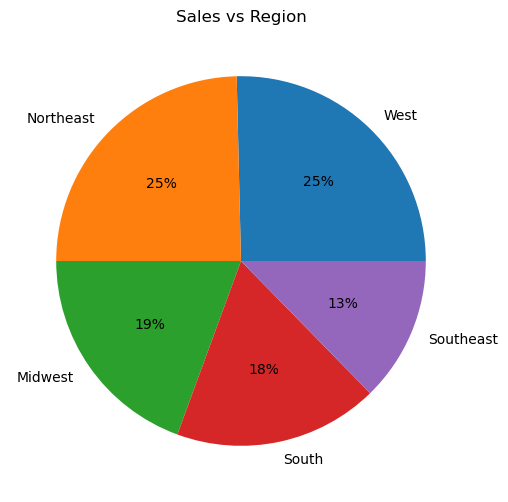

In [15]:
plt.figure(figsize=(6,6))
plt.pie(df1.region_sales, labels=df1.index,autopct='%1.0f%%')
plt.title('Sales vs Region',color='black');
#from this graph we conclude that grion northwest and west has same range of sale than others

In [45]:
sales_by_product = ad.groupby('Product')['Total Sales'].sum()

In [70]:
df3=pd.DataFrame(ad.groupby('Product')['Total Sales'].sum())
df3.columns=['Total_Sales']

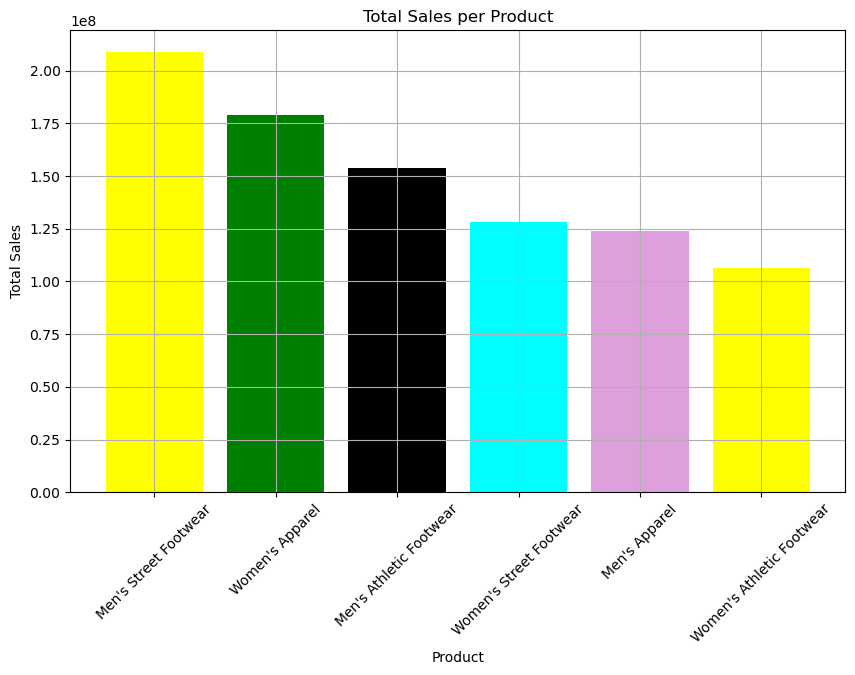

In [76]:
# Plot Bar Chart--from this graph we can conclude that mens street footwear has more sale than any other product
plt.figure(figsize=(10,6))
plt.bar(df3.index,df3.Total_Sales,data=ad,color=('yellow','green','black','aqua','plum'))
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()
df3=df3.sort_values('Product',ascending=False);

In [122]:
df2=pd.DataFrame(ad.groupby('Product')['Operating Profit'].sum())
df2.columns=['Operating_Profit']

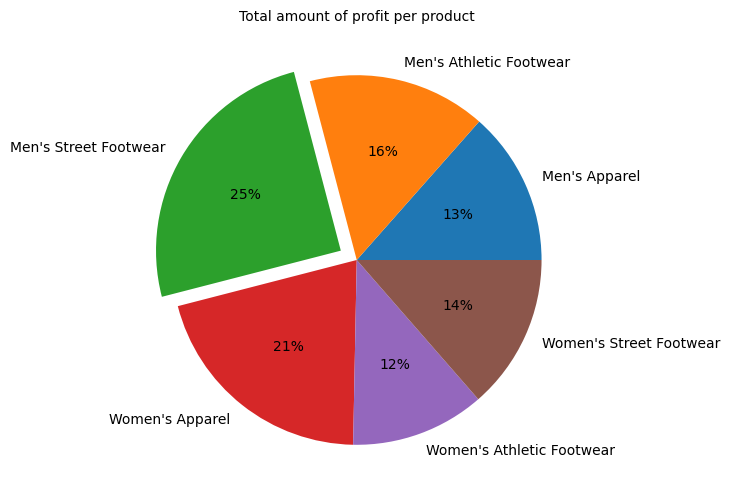

In [154]:
plt.figure(figsize=(6,6))
plt.pie(df2.Operating_Profit, labels=df2.index,autopct='%1.0f%%',explode=(0,0,.1,0,0,0))
plt.title('Total amount of profit per product',size=10);
#from this graph we conclude that among all the products mens street footwear has max amount of profit.

Text(0.5, 1.0, 'Count of products in each region')

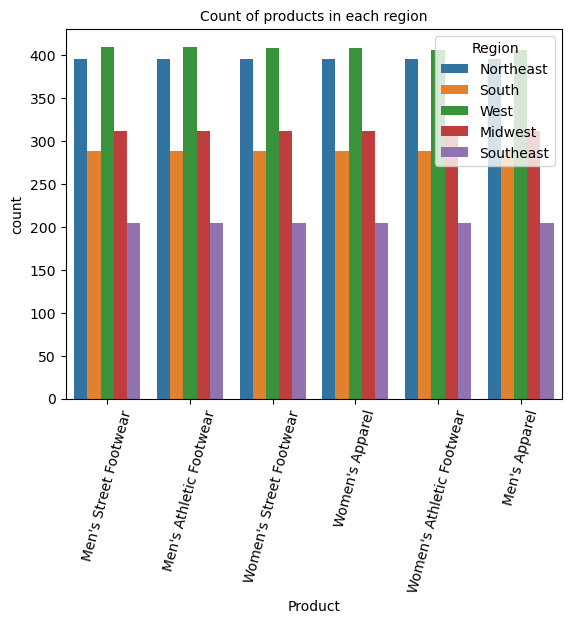

In [15]:
sns.countplot(x='Product',data=ad,order=ad['Product'].value_counts(ascending=False).index,hue='Region')
plt.xticks(rotation=75)
plt.title("Count of products in each region",size=10)

Text(0.5, 1.0, 'Count of products based on retailer')

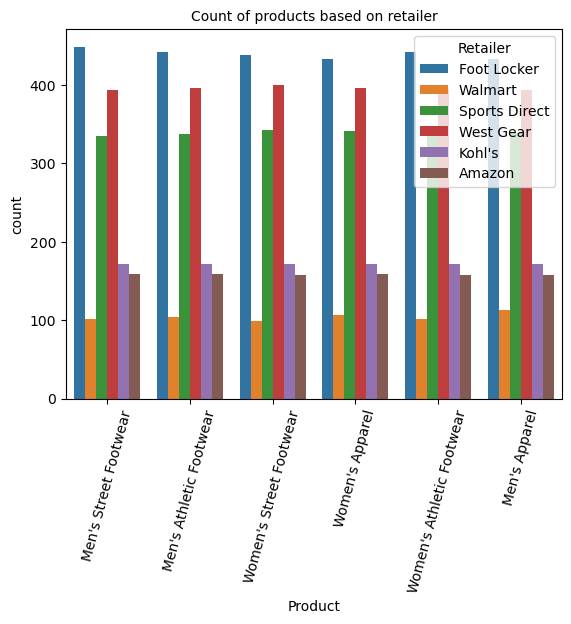

In [7]:
sns.countplot(x='Product',data=ad,order=ad['Product'].value_counts(ascending=False).index,hue='Retailer')
plt.xticks(rotation=75)
plt.title("Count of products based on retailer",size=10)

In [11]:
df4=pd.DataFrame(ad.groupby('Product')['Price per Unit'].sum())
df4.columns=['Price_per_Unit']
df4=df4.sort_values('Price_per_Unit',ascending=False)

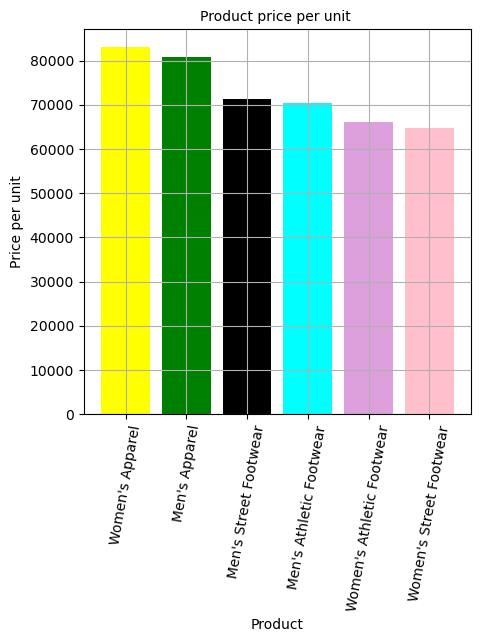

In [19]:
plt.figure(figsize=(5,5))
plt.bar(df4.index,df4.Price_per_Unit,data=ad,color=('yellow','green','black','aqua','plum','pink'))
plt.title('Product price per unit ',size=10)
plt.xlabel('Product')
plt.ylabel('Price per unit')
plt.xticks(rotation=80)
plt.grid()
plt.show();

In [78]:
ad.isnull().sum()

Unnamed: 0          9647
Retailer               0
Retailer ID            0
Invoice Date           0
Region                 0
State                  0
City                   0
Product                0
Price per Unit         0
Units Sold             0
Total Sales            0
Operating Profit       0
Operating Margin       0
Sales Method           0
dtype: int64

In [82]:
ps =pd.DataFrame( ad.groupby('Product')['Total Sales'].sum())
ps.columns=['Total_Sales']

Text(0.5, 1.0, 'Total sale per product')

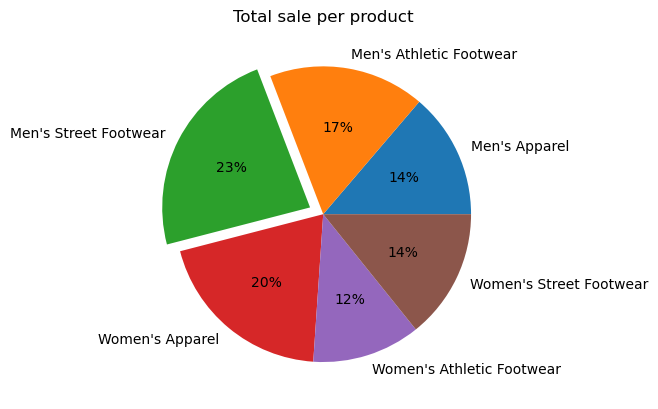

In [138]:
plt.pie(ps.Total_Sales,labels=ps.index,autopct="%1.00f%%",explode=(0,0,.1,0,0,0));
plt.title('Total sale per product')

In [140]:
df = pd.DataFrame(ad)
ad= df.rename(columns={'Operating Profit': 'Operating_Profit', 'Operating Margin': 'Operating_Margin','Sales Method':'Sales_Method'})

In [134]:
ad= df.rename(columns={'Price per Unit': 'Price_per_Unit', 'Units Sold': 'Units_Sold','Total Sales':'Total_Sales'})

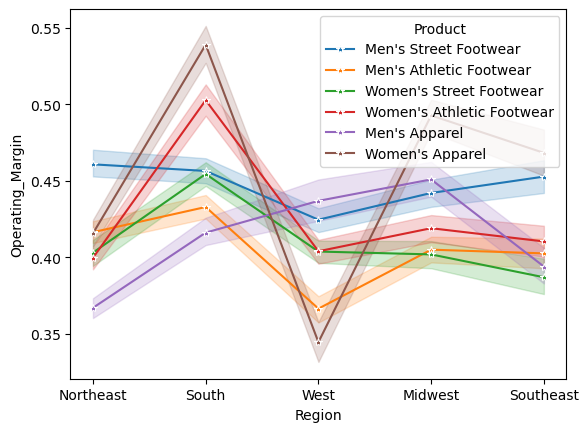

In [118]:
sns.lineplot(x ='Region',y ='Operating_Margin',data=ad,marker='*',hue='Product');

Text(0.5, 0, 'Operating Profit\xa0in\xa0Thousand')

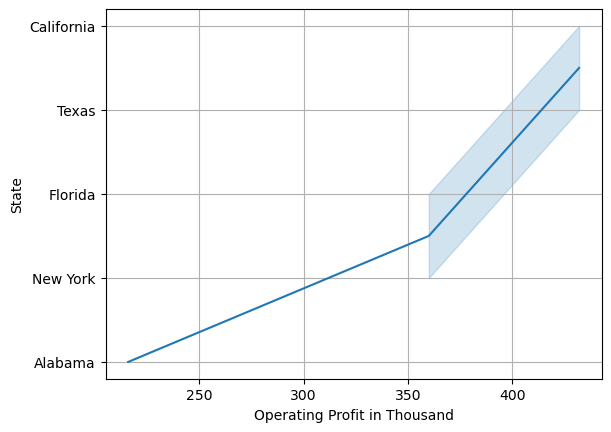

In [120]:
pr=pd.DataFrame(ad.groupby('State')['Operating_Profit'].count().round().nlargest())
sns.lineplot(x=pr.Operating_Profit, y=pr.index  )
plt.grid()
plt.xlabel('Operating Profit in Thousand')

Text(0.5, 1.0, 'Margins of each\xa0Sales\xa0Method')

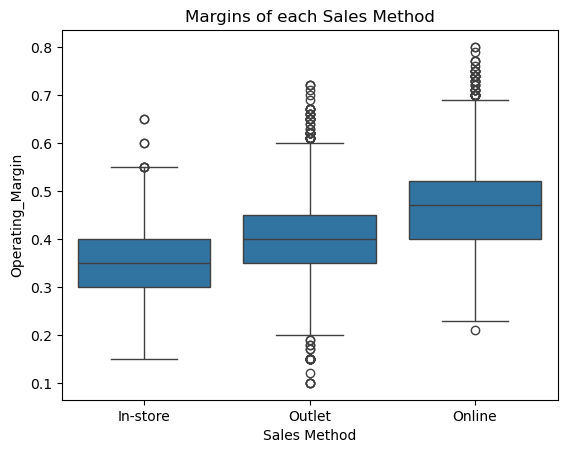

In [126]:
sns.boxplot(x='Sales Method',y='Operating_Margin',data = ad)
plt.title("Margins of each Sales Method")
#operating margin of online sales method is more tkhan other methods


In [51]:
df5

Product
Men's Street Footwear        82802260.62
Women's Apparel              68650970.56
Men's Athletic Footwear      51846888.19
Women's Street Footwear      45095826.81
Men's Apparel                44763030.33
Women's Athletic Footwear    38975784.94
Name: Operating_Profit, dtype: float64

In [49]:
df5= ad.groupby('Product')['Operating_Profit'].sum().sort_values(ascending=False)

In [34]:
#extra plots
import plotly

In [15]:
import cufflinks as cf

In [13]:
#!pip install cufflinks

In [25]:
from plotly import __version__
print(__version__)

5.22.0


In [27]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
lc=pd.read_csv(r'C:\Users\HP\Downloads\LungCapData.csv')

In [46]:
#lc.iplot(kind='Scatter',x='Age',y='LungCap',mode='markers')

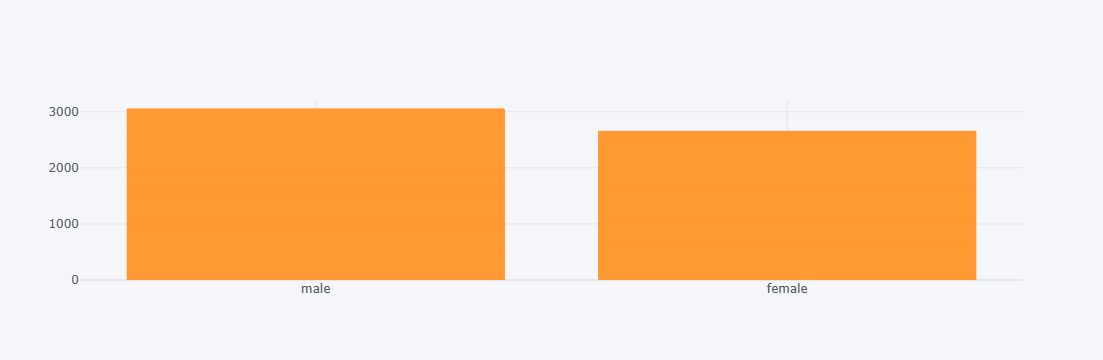

In [38]:
lc.iplot(kind='bar',x='Gender',y='LungCap')

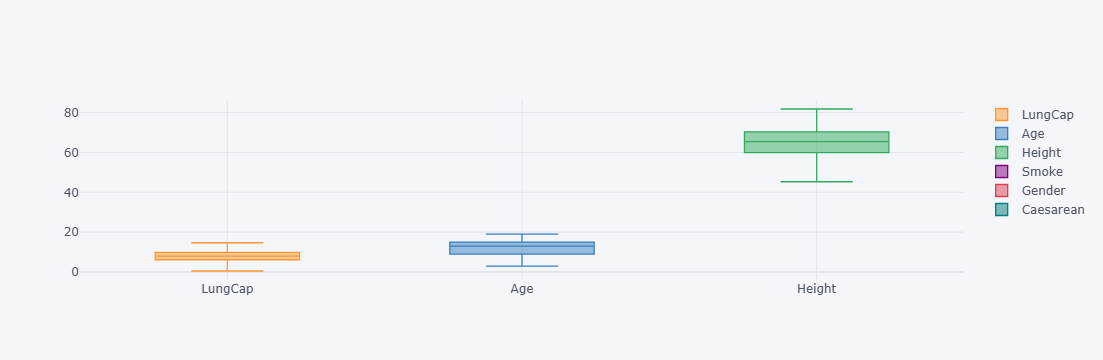

In [48]:
lc.iplot(kind='box')

Credit risk

In [50]:
cr=pd.read_csv(r'C:\Users\HP\Downloads\CreditRisk.csv')

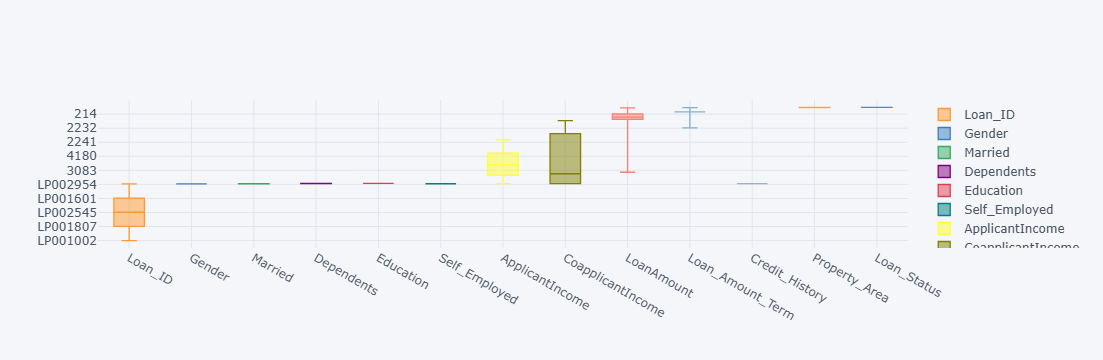

In [52]:
cr.iplot(kind='box')

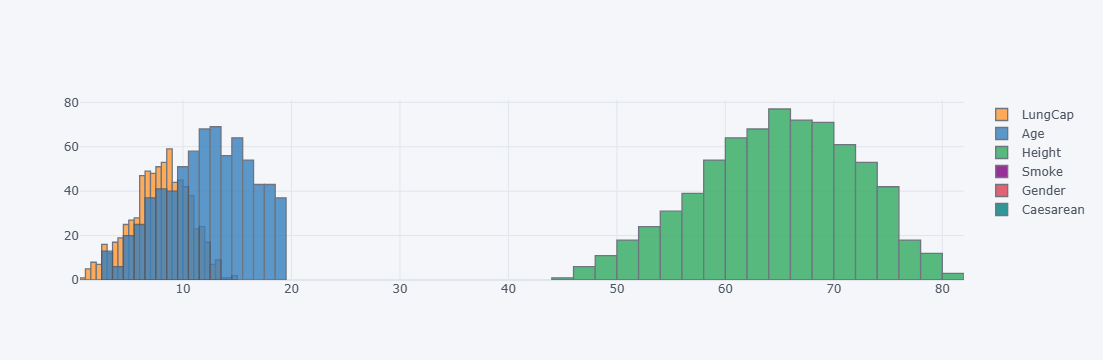

In [54]:
lc.iplot(kind='hist') #here we get plots from all dataset

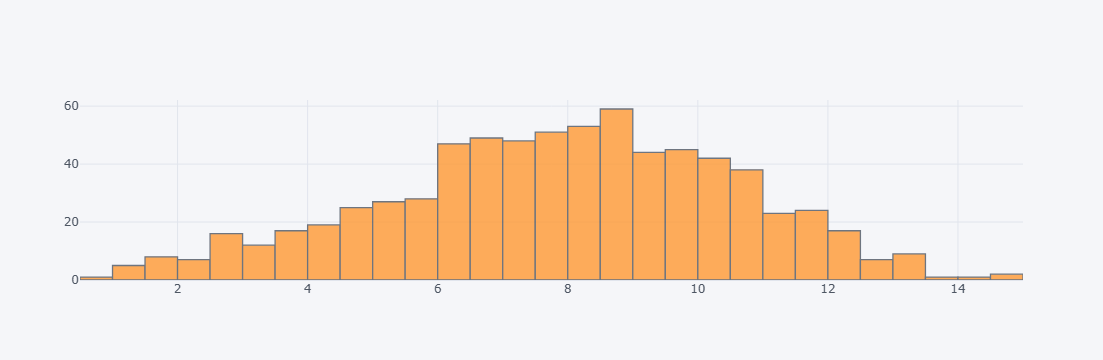

In [58]:
lc.LungCap.iplot(kind='hist') #here we can get histogram on only lungcap data

In [62]:
count_gdp =pd.DataFrame({'GDP':(19.4,11.8,4.8,3.4,2.5,2.4),
                         'countries':('us','china','japan','germany','uk','india')})
count_gdp

,GDP,countries
0,19.4,us
1,11.8,china
2,4.8,japan
3,3.4,germany
4,2.5,uk
5,2.4,india


In [66]:
import plotly.express

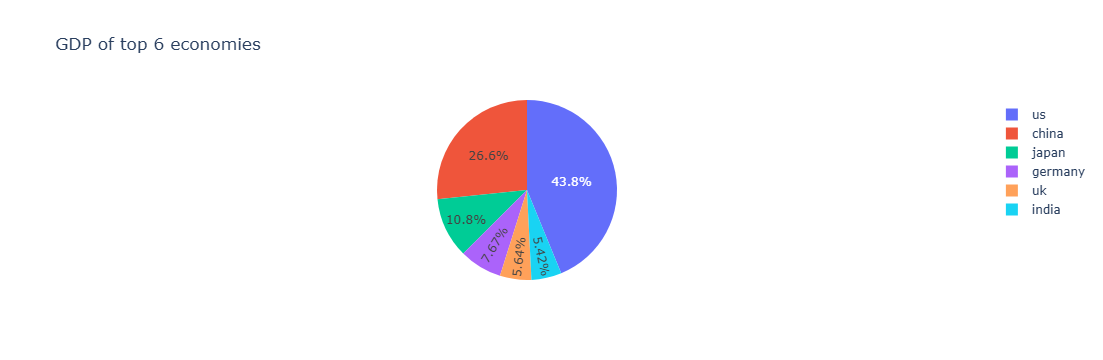

In [68]:
plotly.express.pie(count_gdp,names='countries',values='GDP',title='GDP of top 6 economies')

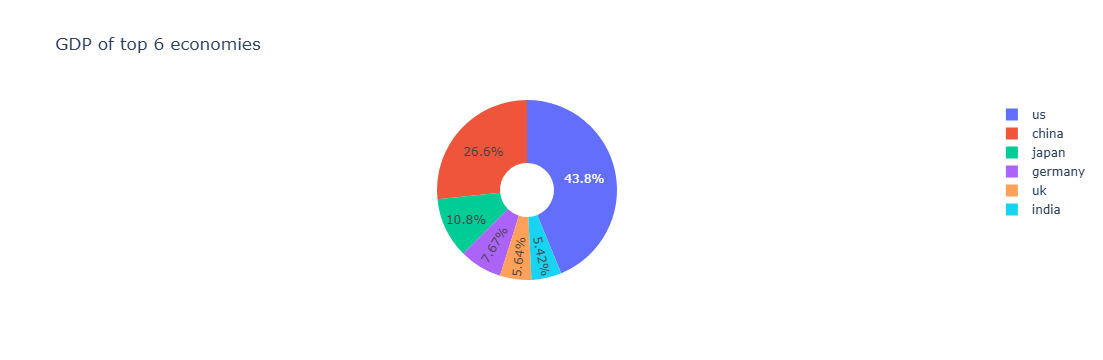

In [76]:
plotly.express.pie(count_gdp,names='countries',values='GDP',title='GDP of top 6 economies',hole=.3)

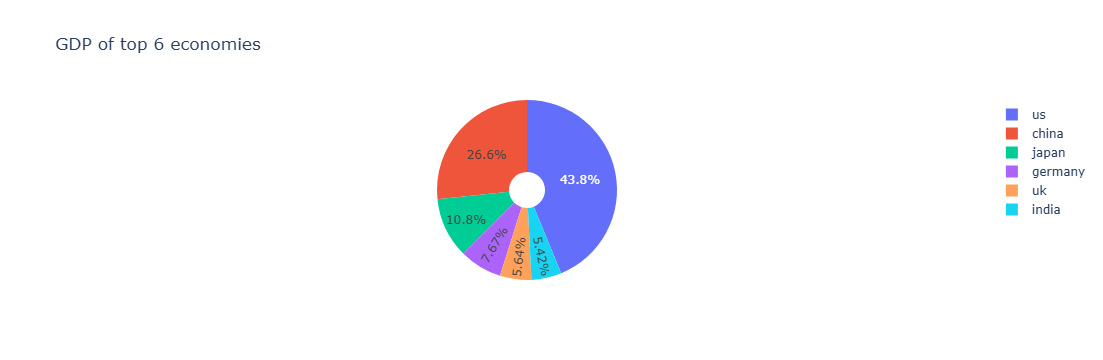

In [78]:
plotly.express.pie(count_gdp,names='countries',values='GDP',title='GDP of top 6 economies',hole=.2)

In [82]:
#sun burst
cs=pd.read_csv(r"C:\Users\HP\Downloads\customer_shopping_data (1).csv")
cs['SalesValue']=cs.price*cs.quantity

In [84]:
import plotly.express as px

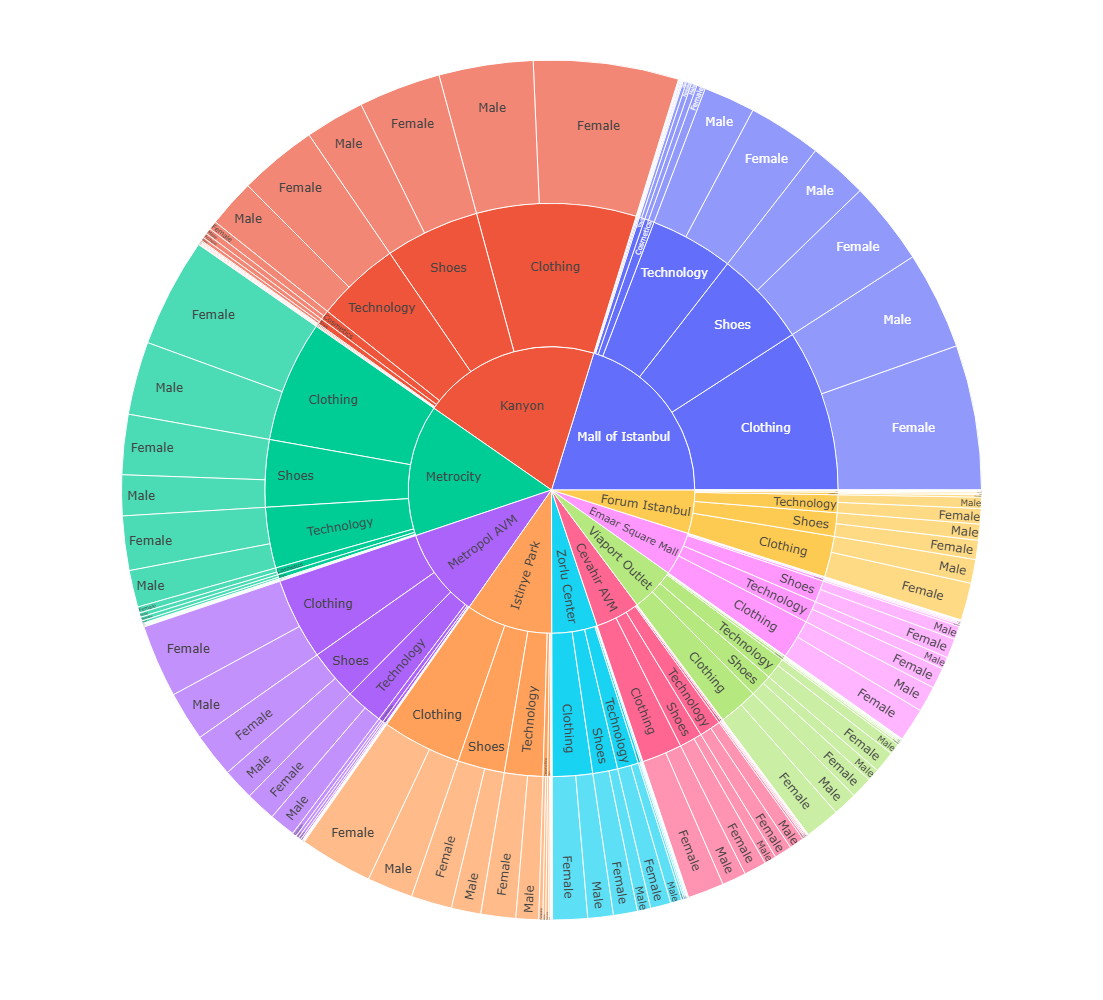

In [148]:
fig= px.sunburst(cs, path=['shopping_mall','category','gender'],values='SalesValue',width=1000,height=1000)
fig.show()

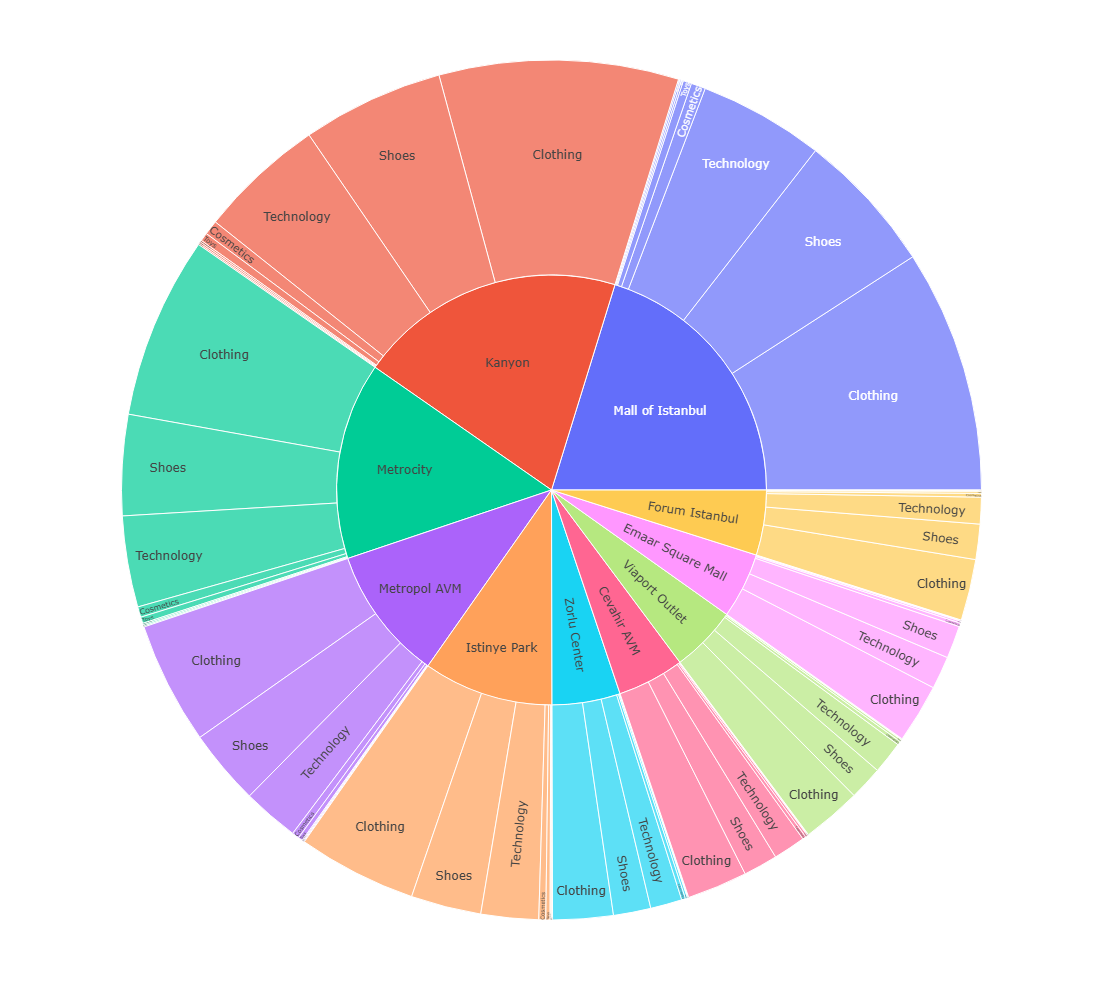

In [88]:
fig= px.sunburst(cs, path=['shopping_mall','category'],values='SalesValue',width=1000,height=1000)
fig.show()

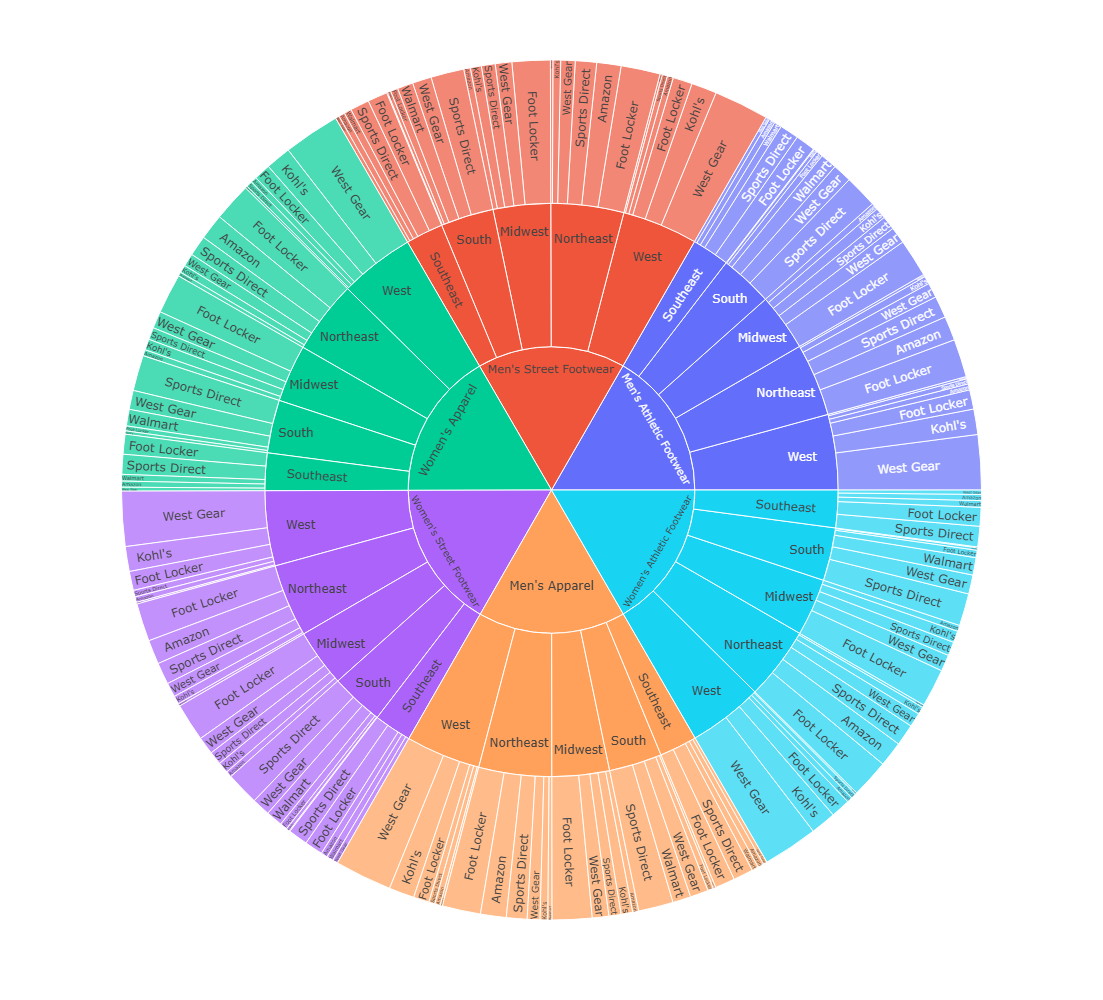

In [146]:
fig= px.sunburst(ad, path=['Product','Region','Retailer'],width=1000,height=1000)
fig.show()

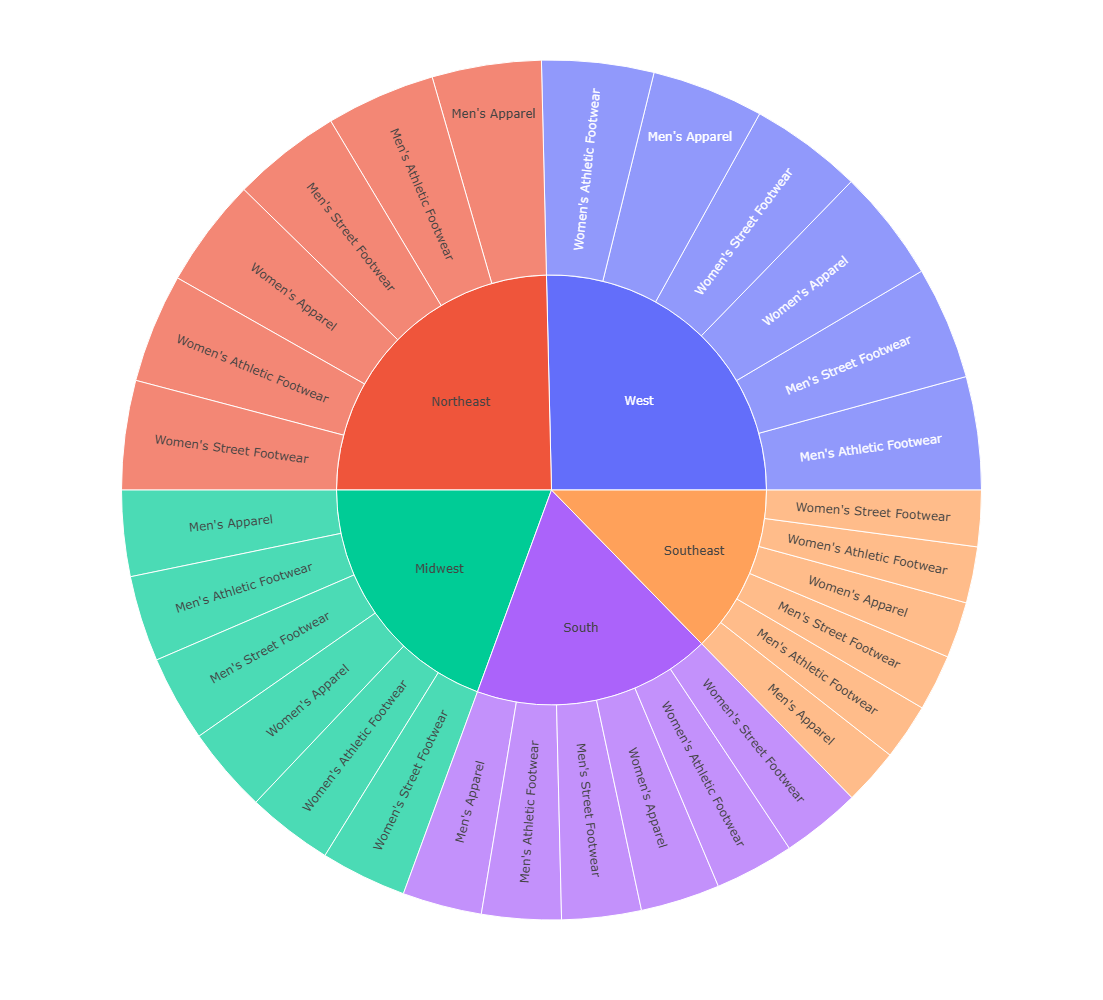

In [120]:
fig= px.sunburst(ad, path=['Region','Product'],width=1000,height=1000)
fig.show()

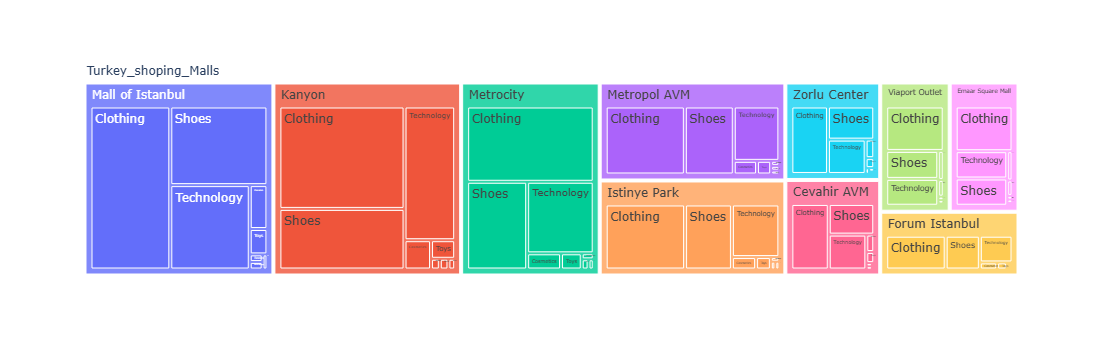

In [154]:
fig=px.treemap(cs, path=[px.Constant('Turkey_shoping_Malls'),'shopping_mall','category'],values='SalesValue',color_continuous_scale='RdBu')
fig.show()

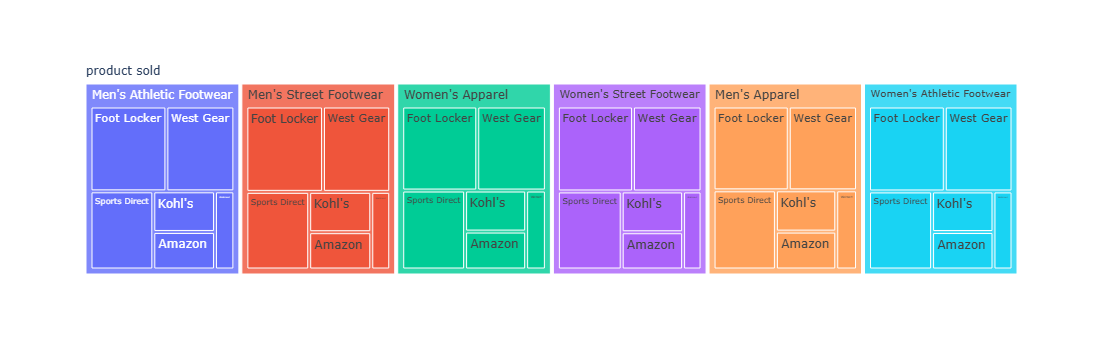

In [156]:
fig=px.treemap(ad, path=[px.Constant('product sold '),'Product','Retailer'],color_continuous_scale='RdBu')
fig.show()

In [158]:
import matplotlib.pyplot as plt

In [162]:
prod_sales  = pd.DataFrame()
prod_sales['number_of_products']=[6,14,21,18,25]
prod_sales['sales_in_million']=[10,16.7,28,20,34]
prod_sales

,number_of_products,sales_in_million
0,6,10.0
1,14,16.7
2,21,28.0
3,18,20.0
4,25,34.0


In [ ]:
#BUBBLE CHART-----here alpha is used to chnage the color of bubble by default its 1.

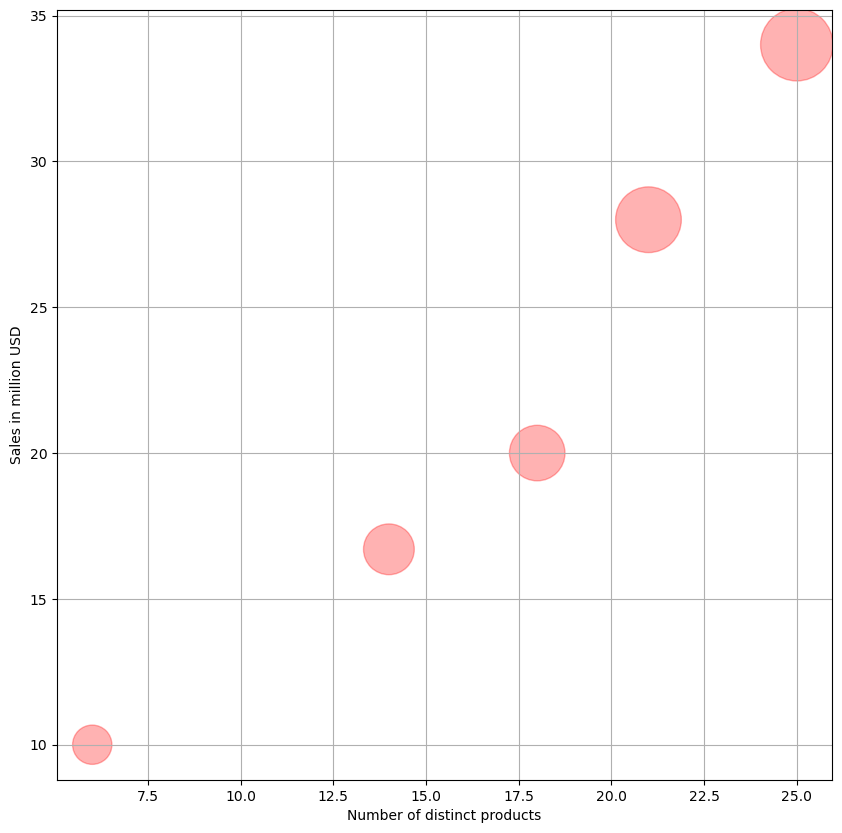

In [182]:
plt.figure(figsize=(10,10))
plt.scatter(prod_sales['number_of_products'],prod_sales['sales_in_million'],s=prod_sales['sales_in_million']*80,color='red',alpha=.3)
plt.grid()
plt.xlabel('Number of distinct products',size=10)
plt.ylabel('Sales in million USD',size=10);

In [206]:
cs=pd.read_csv(r"C:\Users\HP\Downloads\customer_shopping_data (1).csv")
cs.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [190]:
df1=pd.DataFrame(cs.gender.value_counts())
df1.columns=['gend_count']

In [214]:
df2=pd.DataFrame(cs.shopping_mall.value_counts())
df2.columns=['shop_count']

In [216]:
df3=pd.DataFrame(cs.category.value_counts())
df3.columns=['cat_count']

In [218]:
df4=pd.DataFrame(cs.payment_method.value_counts())
df4.columns=['pay_count']

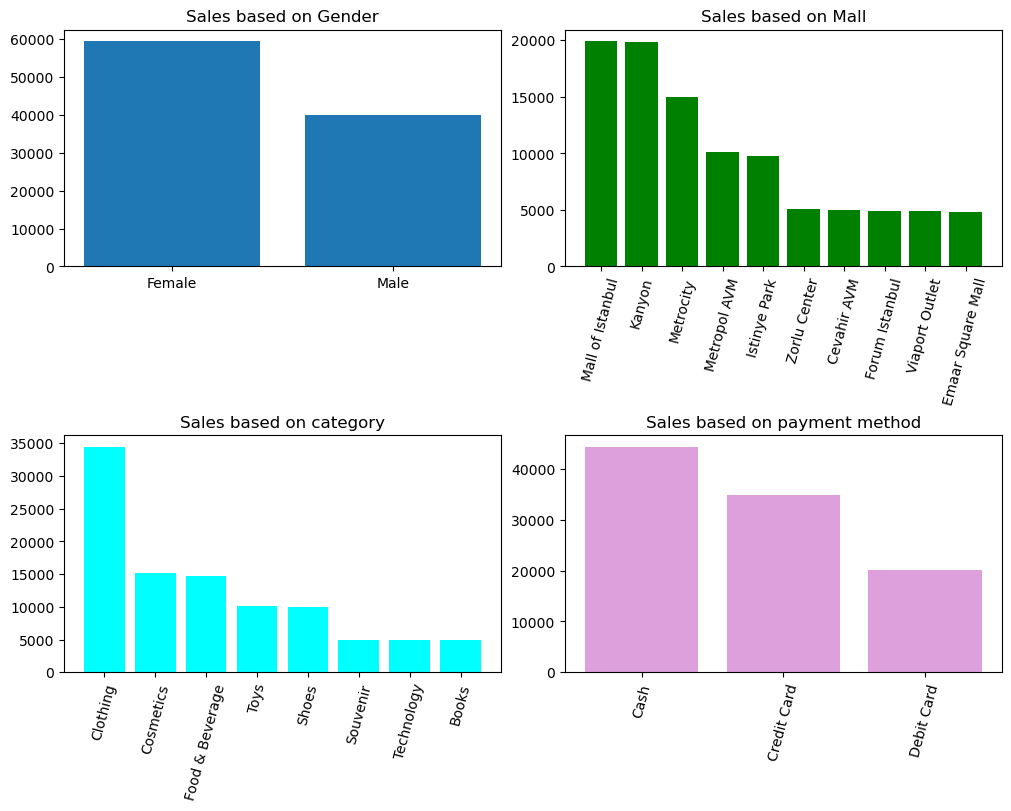

In [220]:
fig, ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8),constrained_layout=True)
ax[0,0].bar(df1.index,df1.gend_count)
ax[0,1].bar(df2.index,df2.shop_count,color='green')
ax[1,0].bar(df3.index,df3.cat_count,color='aqua')
ax[1,1].bar(df4.index,df4.pay_count,color='plum')
ax[0,1].tick_params(axis='x',rotation=75)
ax[1,0].tick_params(axis='x',rotation=75)
ax[1,1].tick_params(axis='x',rotation=75)
ax[0,0].title.set_text('Sales based on Gender')
ax[0,1].title.set_text('Sales based on Mall')
ax[1,0].title.set_text('Sales based on category')
ax[1,1].title.set_text('Sales based on payment method')
#constrained_layout is used to add some space between the graphs.

In [3]:
tr=pd.read_csv(r'C:\Users\HP\Downloads\train.csv')

In [43]:
df4=pd.DataFrame(tr.three_g.value_counts())
df4.columns=['three_g_counts']

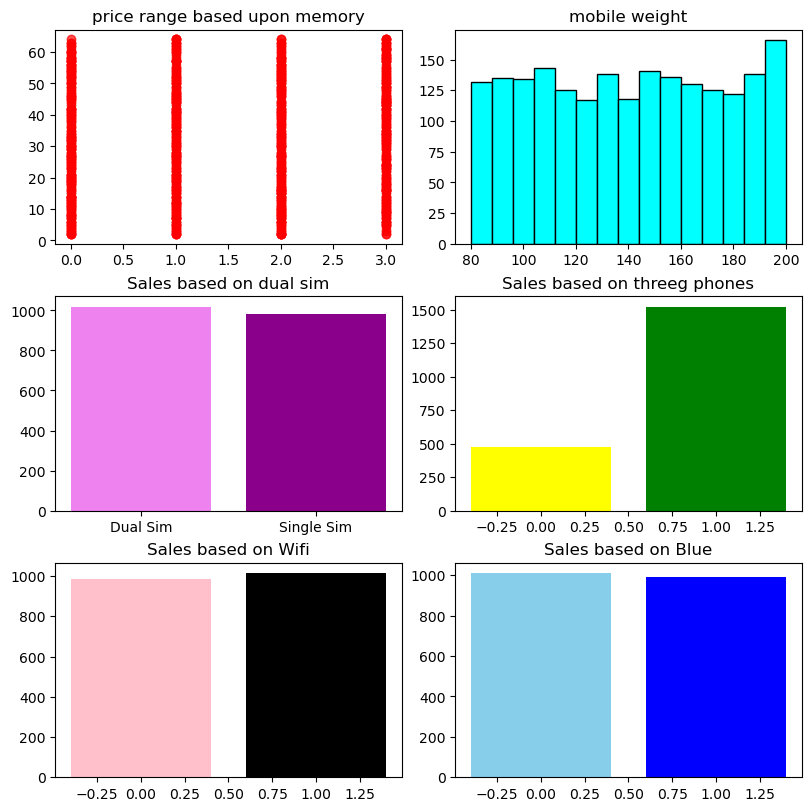

In [51]:
fig, ax=plt.subplots(nrows=3,ncols=2,figsize=(8,8),constrained_layout=True)
ax[0,0].scatter(tr['price_range'],tr['int_memory'],color='red',alpha=.3)
ax[0,0].title.set_text('price range based upon memory')
ax[0,1].hist(tr.mobile_wt,color='aqua',bins=15,edgecolor='black')
ax[0,1].title.set_text('mobile weight')
ax[1,0].bar(['Dual Sim' , 'Single Sim'] , [tr['dual_sim'].sum() , len(tr) - tr['dual_sim'].sum()] , color = ['violet' , 'darkmagenta'])
ax[1,0].title.set_text('Sales based on dual sim')
ax[1,1].bar(df4.index,df4.three_g_counts,color=['green','yellow'])
ax[1,1].title.set_text('Sales based on threeg phones')
ax[2,0].bar(df9.index , df9.count_of_wifi , color = ['black','pink'])
ax[2,1].bar(df10.index , df10.count_of_blue , color = ['skyblue','blue'])
ax[2,0].title.set_text("Sales based on Wifi")
ax[2,1].title.set_text("Sales based on Blue");

In [1]:
#plt.figure(figsize=(4,4))
#plt.scatter(tr['price_range'],tr['int_memory'],color='red',alpha=.3)

In [45]:
df5 = pd.DataFrame(tr.dual_sim.value_counts())
df5.columns = ['count_of_dualsim']
df6 = pd.DataFrame(tr.four_g.value_counts())
df6.columns = ['count_of_4G']
df7 = pd.DataFrame(tr.three_g.value_counts())
df7.columns = ['count_of_3G']
df8 = pd.DataFrame(tr.touch_screen.value_counts())
df8.columns = ['count_of_touch']
df9 = pd.DataFrame(tr.wifi.value_counts())
df9.columns = ['count_of_wifi']
df10 = pd.DataFrame(tr.blue.value_counts())
df10.columns = ['count_of_blue']

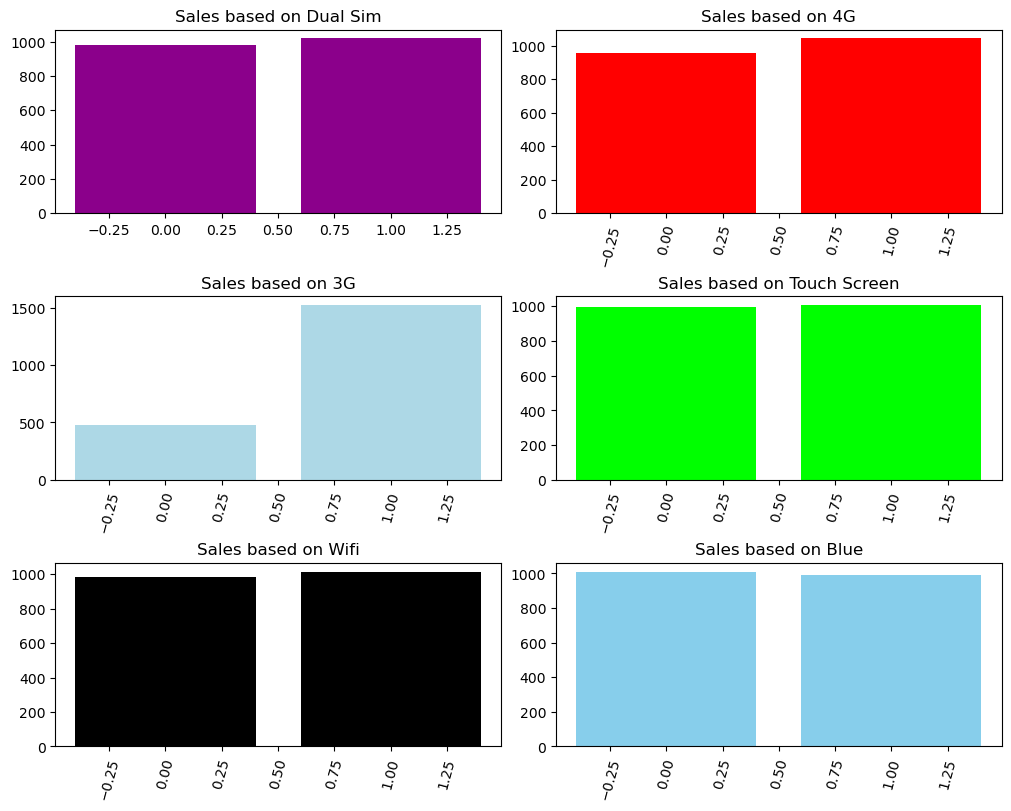

In [21]:
ig, ax = plt.subplots(nrows = 3 , ncols = 2 , figsize = (10,8) , constrained_layout = True)
ax[0,0].bar(df5.index , df5.count_of_dualsim , color = 'darkmagenta')
ax[0,1].bar(df6.index , df6.count_of_4G , color = 'red')
ax[1,0].bar(df7.index , df7.count_of_3G , color = 'lightblue')
ax[1,1].bar(df8.index , df8.count_of_touch , color = 'lime')
ax[2,0].bar(df9.index , df9.count_of_wifi , color = 'black')
ax[2,1].bar(df10.index , df10.count_of_blue , color = 'skyblue')

ax[0,1].tick_params(axis = 'x' , rotation = 75)
ax[1,0].tick_params(axis = 'x' , rotation = 75)
ax[1,1].tick_params(axis = 'x' , rotation = 75)
ax[2,0].tick_params(axis = 'x' , rotation = 75)
ax[2,1].tick_params(axis = 'x' , rotation = 75)

ax[0,0].title.set_text("Sales based on Dual Sim")
ax[0,1].title.set_text("Sales based on 4G")
ax[1,0].title.set_text("Sales based on 3G")
ax[1,1].title.set_text("Sales based on Touch Screen")
ax[2,0].title.set_text("Sales based on Wifi")
ax[2,1].title.set_text("Sales based on Blue");